In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Crop(Distric level).csv')  # Replace with actual file name

In [ ]:
df = df.drop('district', axis=1)  # Only if it's unnecessary


In [ ]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
      cotton       0.98      1.00      0.99        61
      grapes       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        11
       maize       1.00      0.98      0.99        57
       mango       1.00      1.00      1.00        19
     millets       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        19
      pulses       1.00      1.00      1.00        26
        rice       1.00      0.95      0.98        42
   sugarcane       0.97      1.00      0.99        70
       wheat       1.00      1.00      1.00        60

    accuracy                           0.99       440
   macro avg       1.00      0.99      1.00       440
weighted avg       0.99      0.99      0.99       440



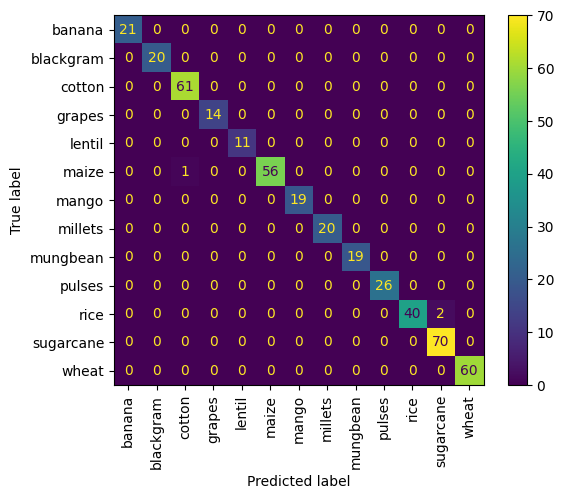

In [ ]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap='viridis', xticks_rotation=90)


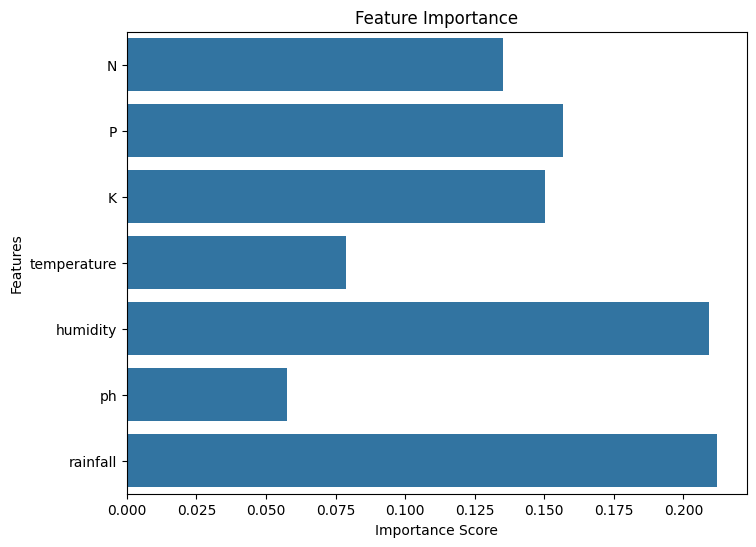

In [ ]:
importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
sample = np.array([[90, 42, 43, 20.8, 82.0, 6.5, 202.9]])  # Change values as needed
predicted_crop = rf.predict(sample)
print("🌾 Recommended Crop:", predicted_crop[0])


🌾 Recommended Crop: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
samples = [
    [70, 40, 35, 32.0, 45.0, 7.5, 90.0],
    [70, 40, 35, 32.0, 45.0, 7.5, 90.0],
    [50, 30, 50, 18.0, 90.0, 5.5, 250.0],
    [120, 100, 90, 25.0, 70.0, 6.4, 180.0],
    [40, 20, 30, 30.0, 30.0, 7.2, 50.0]
]

for i, s in enumerate(samples, 1):
    sample = np.array([s])
    prediction = rf.predict(sample)
    print(f"🌿 Sample {i} - Predicted Crop: {prediction[0]}")


🌿 Sample 1 - Predicted Crop: cotton
🌿 Sample 2 - Predicted Crop: cotton
🌿 Sample 3 - Predicted Crop: rice
🌿 Sample 4 - Predicted Crop: banana
🌿 Sample 5 - Predicted Crop: mango


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(rf, 'crop_model.pkl')


['crop_model.pkl']

In [ ]:
!pip install flask-ngrok


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok



In [ ]:
from flask import Flask, request, jsonify,render_template
from flask_ngrok import run_with_ngrok
import pickle

model = joblib.load('crop_model.pkl')
app = Flask(__name__)
